In [1]:
import tensorflow.keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## y = mx + b + noise

In [11]:
m = 2
b = 3
x = np.linspace(0, 50, 100)

In [12]:
np.random.seed(101)
noise = np.random.normal(loc=0, scale=4, size=len(x))

In [13]:
y = 2*x + b + noise

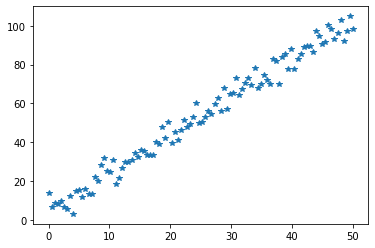

In [14]:
plt.plot(x, y, '*')

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(4, input_dim=1,activation='relu'))
model.add(Dense(4, activation ='relu'))
model.add(Dense(1, activation ='relu'))
model.compile(loss = 'mse')

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x,y,epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 1835.2828
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 1760.2566
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 1708.3179
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 1661.5303
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 1622.3416
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1580.1083
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 1546.7878
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 1506.9521
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 1470.2085
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 1427.7432
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 1386.2589
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 1352.8347
Epoch 13/200
4/4 [=======

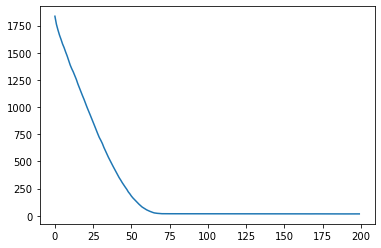

In [19]:
loss = model.history.history['loss']
epochs = range(len(loss))

plt.plot(epochs, loss)

In [20]:
x_for_predictions = np.linspace(0, 50, 100)

y_pred = model.predict(x_for_predictions)

In [21]:
y_pred

array([[  2.7469127],
       [  3.77153  ],
       [  4.796148 ],
       [  5.820765 ],
       [  6.8453813],
       [  7.8699994],
       [  8.894616 ],
       [  9.919232 ],
       [ 10.94385  ],
       [ 11.968469 ],
       [ 12.993085 ],
       [ 14.017701 ],
       [ 15.042319 ],
       [ 16.066938 ],
       [ 17.091555 ],
       [ 18.116175 ],
       [ 19.140789 ],
       [ 20.165407 ],
       [ 21.190025 ],
       [ 22.214643 ],
       [ 23.23926  ],
       [ 24.263876 ],
       [ 25.288492 ],
       [ 26.313112 ],
       [ 27.337729 ],
       [ 28.362345 ],
       [ 29.386963 ],
       [ 30.411581 ],
       [ 31.436197 ],
       [ 32.46081  ],
       [ 33.48543  ],
       [ 34.510048 ],
       [ 35.534664 ],
       [ 36.559277 ],
       [ 37.5839   ],
       [ 38.608517 ],
       [ 39.633137 ],
       [ 40.65775  ],
       [ 41.682373 ],
       [ 42.70699  ],
       [ 43.7316   ],
       [ 44.75622  ],
       [ 45.780834 ],
       [ 46.805458 ],
       [ 47.83007  ],
       [ 4

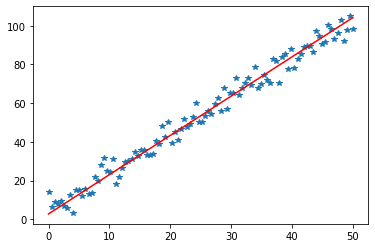

In [22]:
plt.plot(x,y, '*')
plt.plot(x_for_predictions, y_pred, 'r')

In [23]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import mse

In [24]:
print(mean_squared_error(y,y_pred))

17.764145266496467


In [25]:
a = [1,2,3,4,5]
b = [2,3,4,5,6]

In [26]:
mean_squared_error(a,b)

1.0

In [27]:
mse(a,b)

1.0

In [28]:
y_pred_reshape = y_pred.reshape(100, )

In [29]:
y_pred_reshape.shape

(100,)

In [30]:
mse(y, y_pred_reshape)

17.764145266496467

# Recurrent Neural Network

In [31]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('Data/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [33]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [35]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

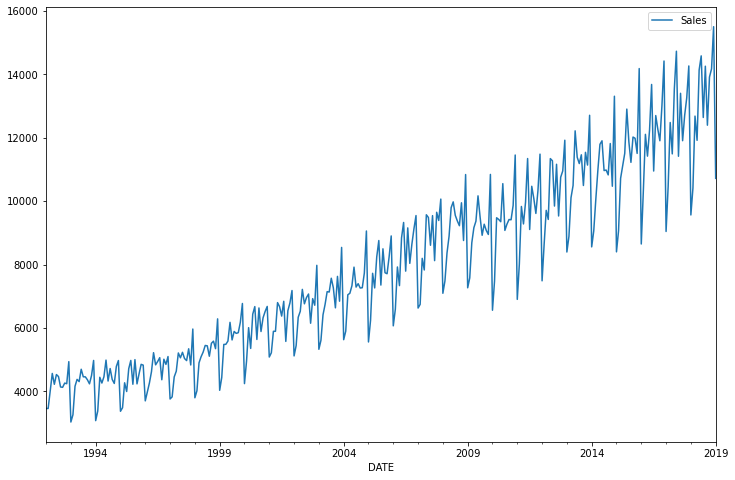

In [36]:
df.plot(figsize=(12,8))

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
results = seasonal_decompose(df['Sales'])

In [43]:
results.seasonal #plot(figsize=(12,8))

DATE
1992-01-01   -1836.088354
1992-02-01   -1321.328738
1992-03-01    -148.299892
1992-04-01    -240.372008
1992-05-01     554.966133
                 ...     
2018-09-01    -109.224572
2018-10-01     260.730557
2018-11-01     258.666454
2018-12-01    1303.892416
2019-01-01   -1836.088354
Freq: MS, Name: seasonal, Length: 325, dtype: float64

In [45]:
len(df)

325

In [47]:
nobs = 12

In [48]:
train = df.iloc[:-nobs]
test = df.iloc[-nobs:]

In [51]:
ser = np.array([23,56,2,13,14])

In [52]:
ser.max()

56

In [53]:
ser / ser.max()

array([0.41071429, 1.        , 0.03571429, 0.23214286, 0.25      ])

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
scaler.fit(train) # finds the max value in train data

MinMaxScaler()

In [57]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [59]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [69]:
n_input = 3
n_features = 1

generator = TimeseriesGenerator(scaled_train, scaled_train,length=n_input,batch_size=1)

In [70]:
len(scaled_train)

313

In [71]:
len(generator)

310

In [72]:
X,y = generator[0]

In [73]:
print(X)
print(y)

[[[0.03658432]
  [0.03649885]
  [0.08299855]]]
[[0.13103684]]


In [74]:
X.shape

(1, 3, 1)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [80]:
n_input = 12
n_features = 1

train_generator = TimeseriesGenerator(scaled_train, scaled_train,length=n_input,batch_size=1)

In [81]:
model = Sequential()

model.add(LSTM(150, activation = 'relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [82]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.fit_generator(train_generator, epochs=25)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
301/301 [==============================] - 5s 18ms/step - loss: 0.0170
Epoch 2/25
301/301 [==============================] - 5s 18ms/step - loss: 0.0098
Epoch 3/25
301/301 [==============================] - 5s 18ms/step - loss: 0.0087
Epoch 4/25
301/301 [==============================] - 5s 18ms/step - loss: 0.0086
Epoch 5/25
301/301 [==============================] - 5s 18ms/step - loss: 0.0077
Epoch 6/25
301/301 [==============================] - 5s 15ms/step - loss: 0.0051
Epoch 7/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0042
Epoch 8/25
301/301 [==============================] - 5s 15ms/step - loss: 0.0036
Epoch 9/25
301/301 [==============================] - 5s 15ms/step - loss: 0.0028
Epoch 10/25
301/301 [==============================] - 5s 15ms/step - loss: 0.0022
Epoch 11/25
301/301 [==============================] - 5s 15ms/step - loss: 0.0024
Epoch 12/25
301/301 

In [84]:
model.history.history.keys()

dict_keys(['loss'])

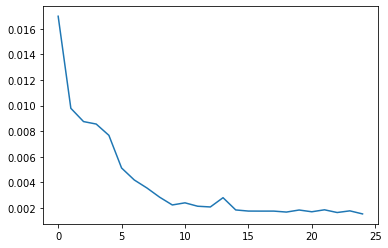

In [86]:
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])

In [87]:
# 12 history steps ---> step 13
# Last 12 points train --> point 1 of test data

In [88]:
first_eval_batch = scaled_train[-12:]

In [89]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [91]:
first_eval_batch = first_eval_batch.reshape((1,n_input, n_features))

In [92]:
model.predict(first_eval_batch)

array([[0.7314653]], dtype=float32)

## FORECAST USING RNN MODEL

In [94]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [95]:
test_predictions

[array([0.7314653], dtype=float32),
 array([0.8324642], dtype=float32),
 array([0.8028721], dtype=float32),
 array([0.94515663], dtype=float32),
 array([1.008543], dtype=float32),
 array([0.79361135], dtype=float32),
 array([0.9141835], dtype=float32),
 array([0.8050848], dtype=float32),
 array([0.87166405], dtype=float32),
 array([0.91545624], dtype=float32),
 array([0.97476], dtype=float32),
 array([0.66045696], dtype=float32)]

In [96]:
true_predictions = scaler.inverse_transform(test_predictions)

In [97]:
true_predictions

array([[11588.41231138],
       [12769.99888802],
       [12423.80094749],
       [14088.38745946],
       [14829.94472694],
       [12315.45915645],
       [13726.03273642],
       [12449.68736255],
       [13228.59768867],
       [13740.92249805],
       [14434.71719247],
       [10757.68592161]])

In [99]:
test['Predictions'] = true_predictions

C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11588.412311
2018-03-01,12683,12769.998888
2018-04-01,11919,12423.800947
2018-05-01,14138,14088.387459
2018-06-01,14583,14829.944727
2018-07-01,12640,12315.459156
2018-08-01,14257,13726.032736
2018-09-01,12396,12449.687363
2018-10-01,13914,13228.597689


<AxesSubplot:xlabel='DATE'>

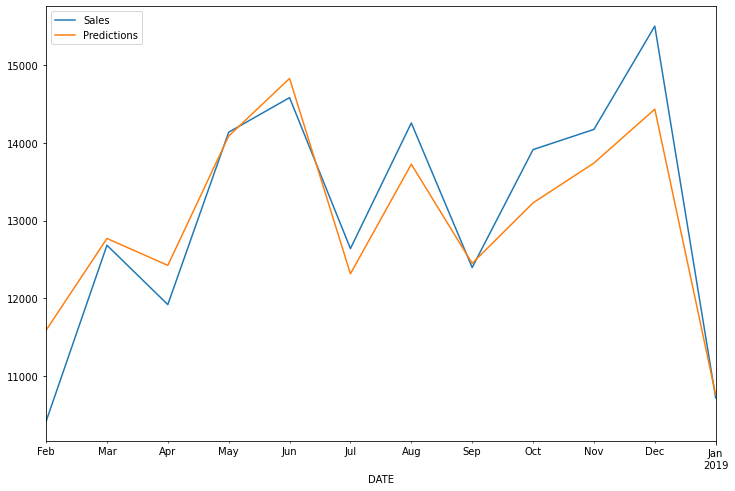

In [101]:
test.plot(figsize=(12,8))

In [102]:
model.save('mycoolmodel.h5')

In [103]:
pwd

'C:\\Users\\ilvna\\Udemy'

In [104]:
from tensorflow.keras.models import load_model

In [105]:
new_model = load_model('mycoolmodel.h5')

In [106]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________
